# Importing Dependencies

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Taking in a Scene Image and changing the color format of image as OpenCV takes in BGR while Matplotlib in RGB

In [39]:
scene = cv2.imread('scene.jpg')
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

# Checking whether image is loaded or not

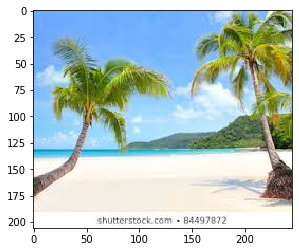

In [40]:
plt.imshow(scene)
plt.show()

# Function to normalize the pixels in the image

In [42]:
def to_std_float(img):
    img.astype(np.float16, copy = False)
    img = np.multiply(img, (1/255))
    return img

# Denormalizing the image as it is normalized before adding or removing the noise

In [41]:
def to_std_uint8(img):
    img = cv2.convertScaleAbs(img, alpha = (255/1))
    return img

# Generating the Salt & Pepper type of noise in the image

In [35]:
def salt_n_pepper(img, pad = 101, show = 1):
    img = to_std_float(img)
    noise = np.random.randint(pad, size = (img.shape[0], img.shape[1], 1))
    img = np.where(noise == 0, 0, img)
    img = np.where(noise == (pad-1), 1, img)
    img = to_std_uint8(img)
    return img

# Function to apply Median filter on the Noisy image as it is best to remove this type of noise

In [43]:
def median(img, ksize = 3, title = 'Median Filter Result', show = 1):
    img = cv2.medianBlur(img, ksize)
    return img

# Generating the Noisy image

In [46]:
noisy_image = salt_n_pepper(scene)

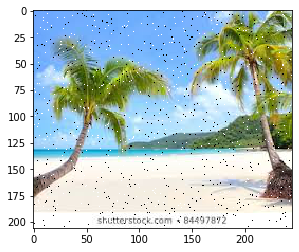

In [47]:
plt.imshow(noisy_image)

# Applying the Median Filter to remove the Noisy image

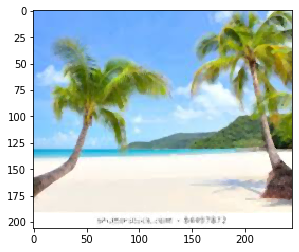

In [45]:
median_applied_image = median(noise_image)
plt.imshow(median_applied_image)

# Good Luck !!!